In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import rankdata
from mpl_toolkits.mplot3d import axes3d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
from matplotlib.gridspec import GridSpec

In [2]:
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1,1], height_ratios=[1])
cmaps = plt.colormaps()
blues = cm.get_cmap("twilight",lut=10)
spec = cm.get_cmap("Spectral",lut =10)
c_blues = [blues(i) for i in range(10)]
c_spec = [spec(i) for i in range(10)]

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 11})

/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_72353/673629478.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  blues = cm.get_cmap("twilight",lut=10)
/var/folders/37/nghp0rpn0wqc9tj09h1nlpm00000gn/T/ipykernel_72353/673629478.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  spec = cm.get_cmap("Spectral",lut =10)


In [16]:
siz = [7]
beta = [3.3,3.57,3.84,4.16,4.54,5,5.55,6.25,7.14,8.33,10,12.5,16.66,25]
temp = []
for i in beta:
    temp.append(round(1/i,2))

temp.reverse()

In [17]:
garr = np.linspace(0,2,201) # range of gamma value
aarr = np.linspace(0,20,21) # range of alpha value

In [18]:
aarr

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [19]:

for s in siz:
    for i in range(len(beta)):
        globals()['data{}s{}'.format(i,s)] = pd.read_csv('./NCA/Nsize{}/NCA_GENSIZE_{}_MODE_20_BETA_{}_GRID_701_MPI.txt'.format(s,s,beta[i]),header=None,delim_whitespace=True)

    for i in range(len(beta)):
        globals()['datmat{}s{}'.format(i,s)] = np.zeros((len(garr),len(aarr)))

    for k in range(len(beta)):
        for i in range(len(garr)):
            for j in range(len(aarr)):
                globals()['datmat{}s{}'.format(k,s)][i][j] = globals()['data{}s{}'.format(k,s)].loc[i][j]


In [20]:
index_gamma = 5
index_alpha = np.arange(0,22,2)
index_alpha

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

FIX ALPHA,CHANGE GAMMA

In [21]:
a = 0
for ia in index_alpha:
    for s in siz:
        for i in range(len(beta)):
            globals()['alparr{}s{}_{}'.format(i,s,ia)]=[]

        for k in range(len(beta)):
            
            for j in range(len(garr)):
                globals()['alparr{}s{}_{}'.format(k,s,ia)].append(globals()['data{}s{}'.format(k,s)].loc[j][index_alpha[a]])
    a += 1

In [22]:

testdef = 0;

for ia in index_alpha:

    for s in siz:
        for i in range(len(beta)-1):
            globals()['testdef{}s{}_{}'.format(i,s,ia)] = []
            for j in range(len(garr)):
                globals()['testdef{}s{}_{}'.format(i,s,ia)].append(globals()['alparr{}s{}_{}'.format(i,s,ia)][j] - globals()['alparr{}s{}_{}'.format(i+1,s,ia)][j])

            #check crossing point(1)
            for k in range(len(garr)-1):
                if np.sign(globals()['testdef{}s{}_{}'.format(i,s,ia)][k]) != np.sign(globals()['testdef{}s{}_{}'.format(i,s,ia)][k+1]):
                    print(k)
                else:
                    globals()['testdef{}s{}_{}'.format(i,s,ia)][k] = 1
            #eliminate end point
            for k in range(len(garr)):
                if k == len(garr)-1:
                    globals()['testdef{}s{}_{}'.format(i,s,ia)][k] = 1
                else:
                    None

        for s in siz:
            globals()['VARs{}{}'.format(s,ia)] = []
            globals()['XARs{}{}'.format(s,ia)] = []
            for i in range(len(beta)-1):
                for k in range(len(garr)):
                    if globals()['testdef{}s{}_{}'.format(i,s,ia)][k] != 1:
                        globals()['VARs{}{}'.format(s,ia)].append(0.5*(1/beta[i] + 1/beta[i+1]))
                        globals()['XARs{}{}'.format(s,ia)].append(garr[k])
                    df = np.column_stack((globals()['VARs{}{}'.format(s,ia)],globals()['XARs{}{}'.format(s,ia)]))
                    np.savetxt("./NCA_size{}_coup_{}.txt".format(s,ia),df)


110
98
86
75
63
52
39
25
114
102
91
80
69
59
48
37
26
11
114
103
92
81
71
60
50
40
30
18
113
102
91
81
70
60
50
40
30
20
4
112
100
90
79
69
59
50
40
30
20
5
110
99
88
78
68
58
49
39
29
19
3
108
97
87
76
66
57
47
38
28
17
106
95
85
75
65
55
46
36
26
16
104
93
83
73
63
53
44
34
25
13
102
91
81
71
61
52
42
33
23
10


plot per size

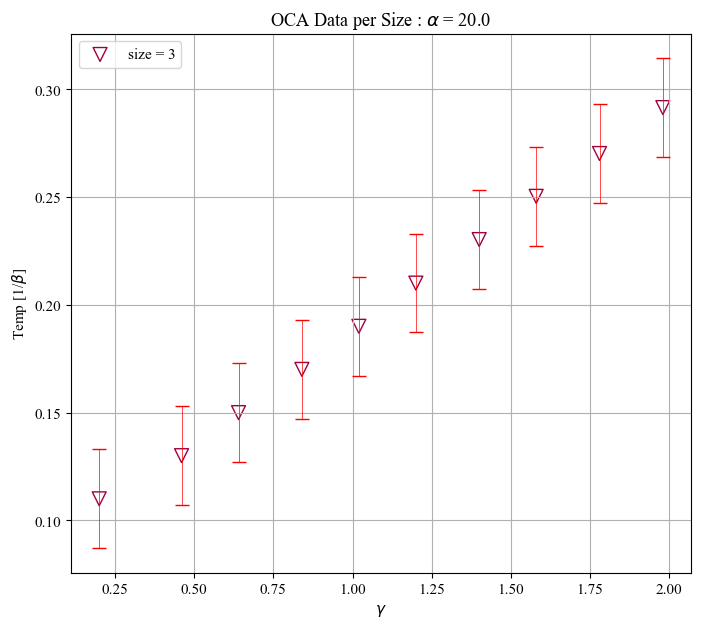

In [60]:
#size plot (beta = 3.3 at sizse 5 : wrong calculated data)

fig = plt.figure(figsize=(8,7))
#plt.title(r"$\alpha$ = " + str(aarr[10]))

size = siz[0]
plt.title("OCA Data per Size"+ r" : $\alpha$ = " + str(aarr[index_alpha]))

mark = ['v','o','D','^']

a = 0

err = np.abs(1/beta[1]-1/beta[0])

for i in siz:
    plt.scatter(globals()['XARs{}'.format(i)],globals()['VARs{}'.format(i)],color=c_spec[a],label = "size = " + str(i) , linewidth = 1 , marker = mark[a] , facecolors='none', s = 100)
    plt.errorbar(globals()['XARs{}'.format(i)],globals()['VARs{}'.format(i)],yerr=err,fmt='', capsize=5, capthick=1, ecolor='red', linestyle='None',linewidth=0.5)
    a += 1

plt.xlabel(r"$\gamma$")
plt.ylabel(r"Temp [1/$\beta$]")
#plt.xlim([0,garr[25]])

plt.grid()
plt.legend()
plt.show()

In [61]:
#per coupling : [0:1, 1:2.5, 2: 5, 3:7.5, 4:10]
stor01 = VARs3
stor11 = XARs3

df = np.column_stack((stor01,stor11))
np.savetxt("NCA_size3_coup_20.txt",df)